In [2]:
#install dataset packages
pip install ucimlrepo

#Analysis Step

In [38]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [52]:
# Pandas EDA

wine_data = pd.concat([X, y], axis=1)
wine_data['target'] = y

print(wine_data.head())
print(wine_data.tail())
print()
print(wine_data.describe())

mean_alcohol = np.mean(wine_data['alcohol'])
median_alcohol = np.median(wine_data['alcohol'])
std_alcohol = np.std(wine_data['alcohol'])
print(f"Mean: {mean_alcohol}, Median: {median_alcohol}, Standard Deviation: {std_alcohol}")


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  target  
0      9.4        5       5  
1      9.8        5       

#Visualization

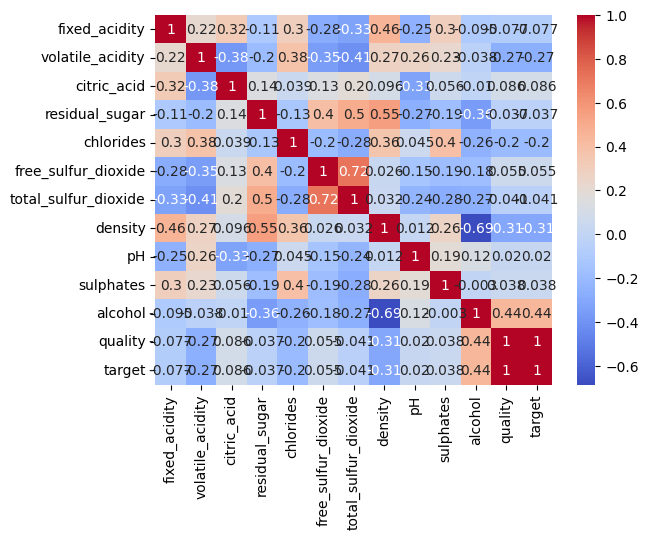

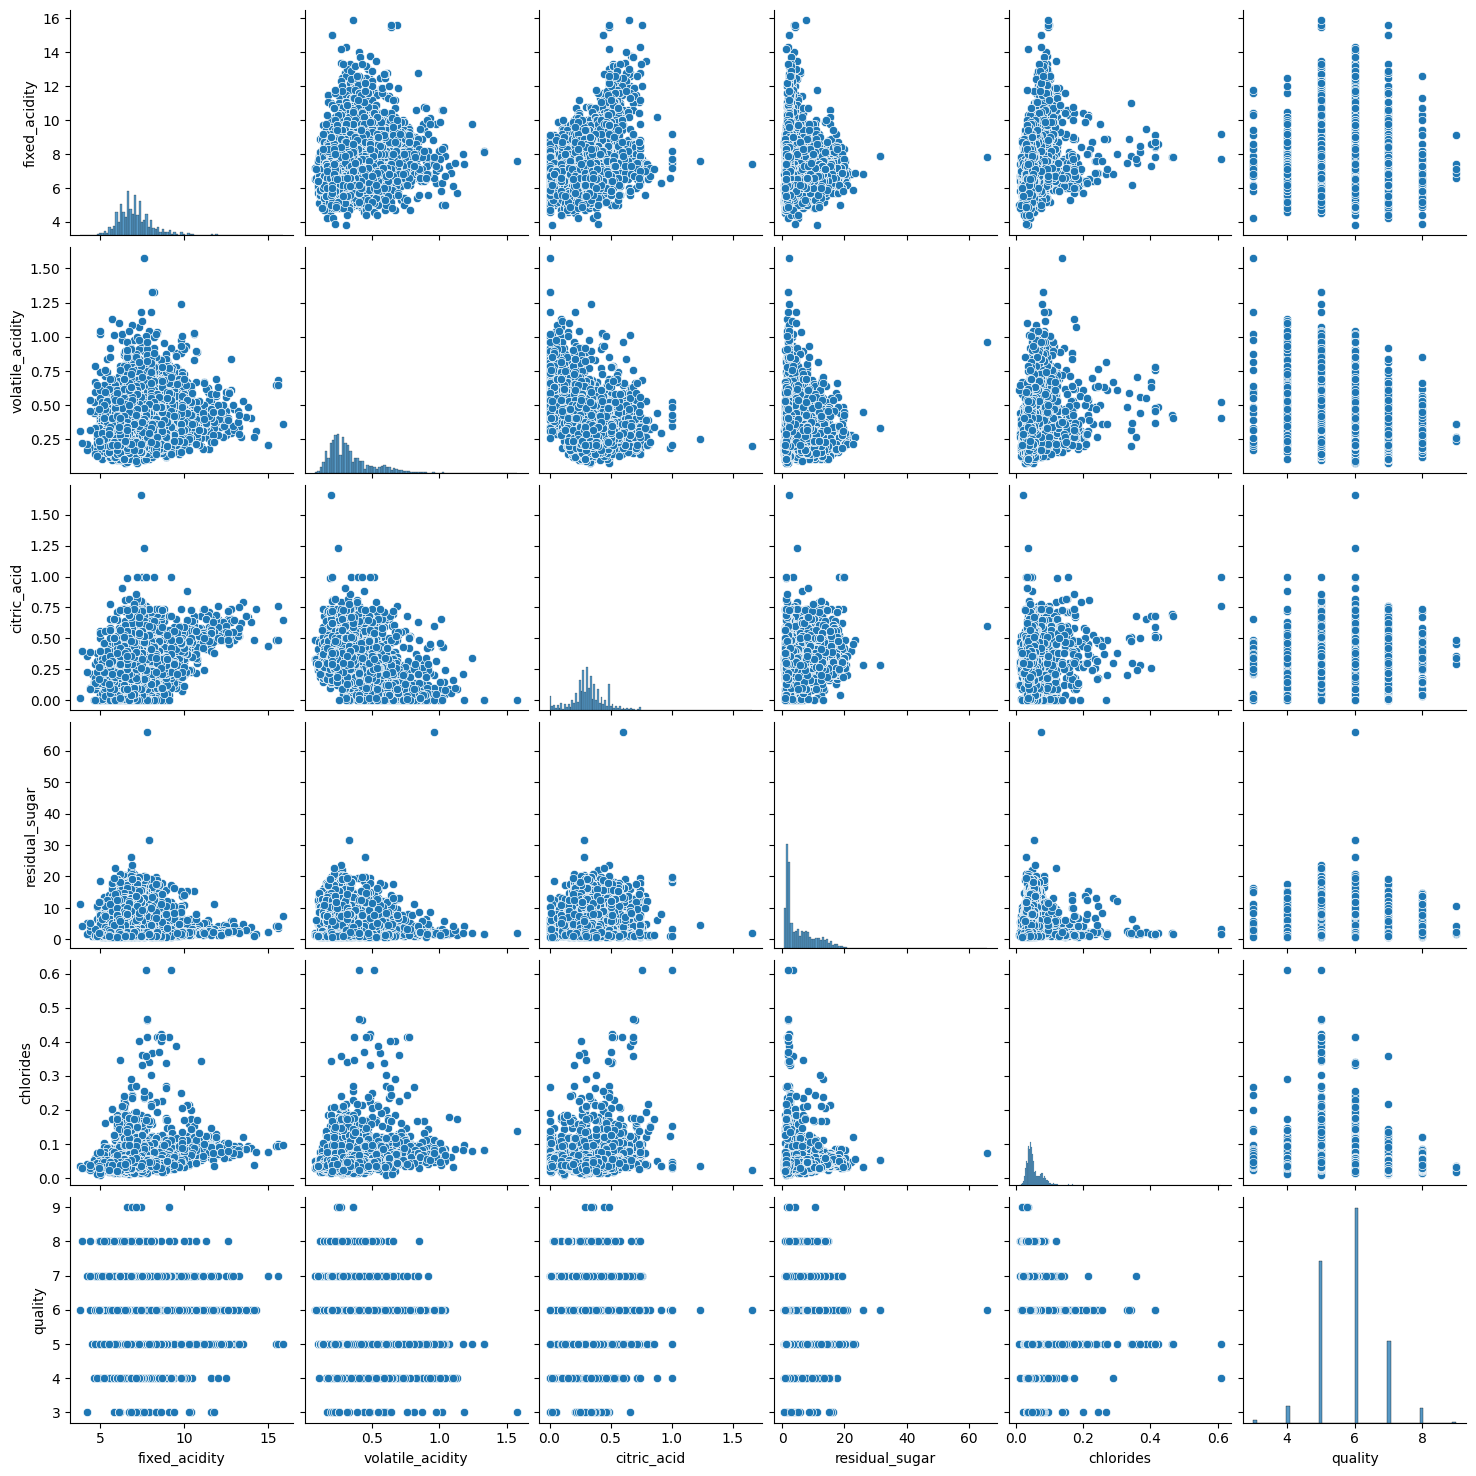

In [56]:
# Visualization

#heatmap of relations between different data columns and wine characteristics
corr = wine_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#pairplot for the wine data columns
sns.pairplot(wine_data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'quality']])
plt.show()

# Hypothesis Formulation
There is a relation between how residual sugars and citric acid affect the taste of wine, ultimately affectings its quality. A citric acid percentage reflecting a not too acid or basic taste will perform best. I also believe that the lower the residual sugar, the higher the wine quality.

There is also a relation to how the alcohol affects the taste of the wine, leading to differences in quality. Similarly to my citric acid hypothesis, I believe that the best wines will have an alcohol percentage that isn't too high or too low.

#Hypothesis Testing

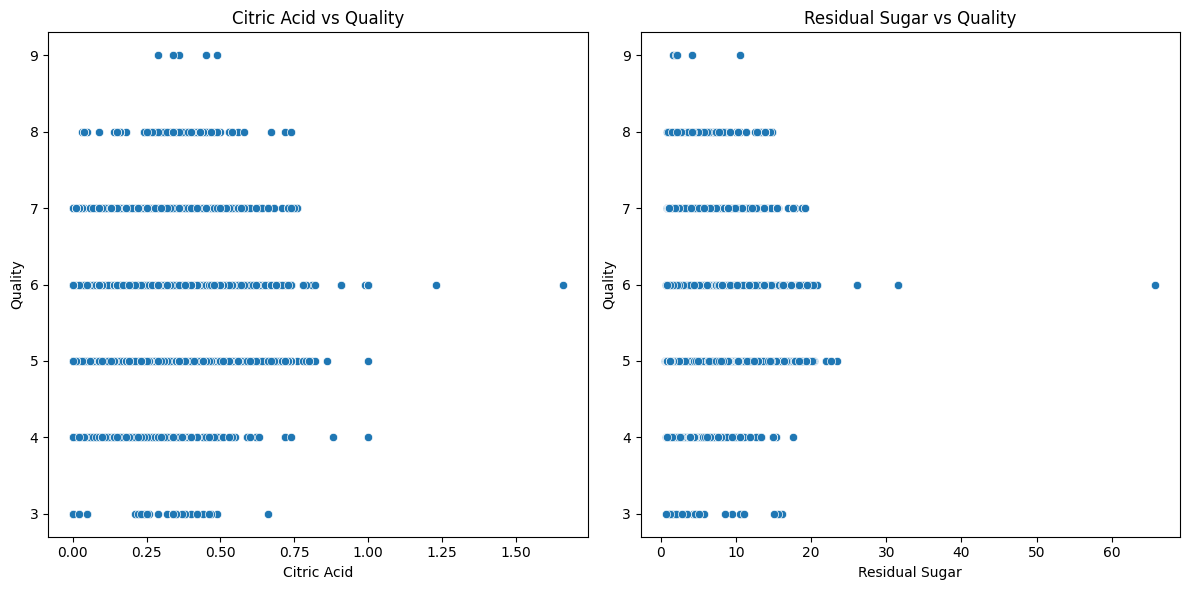

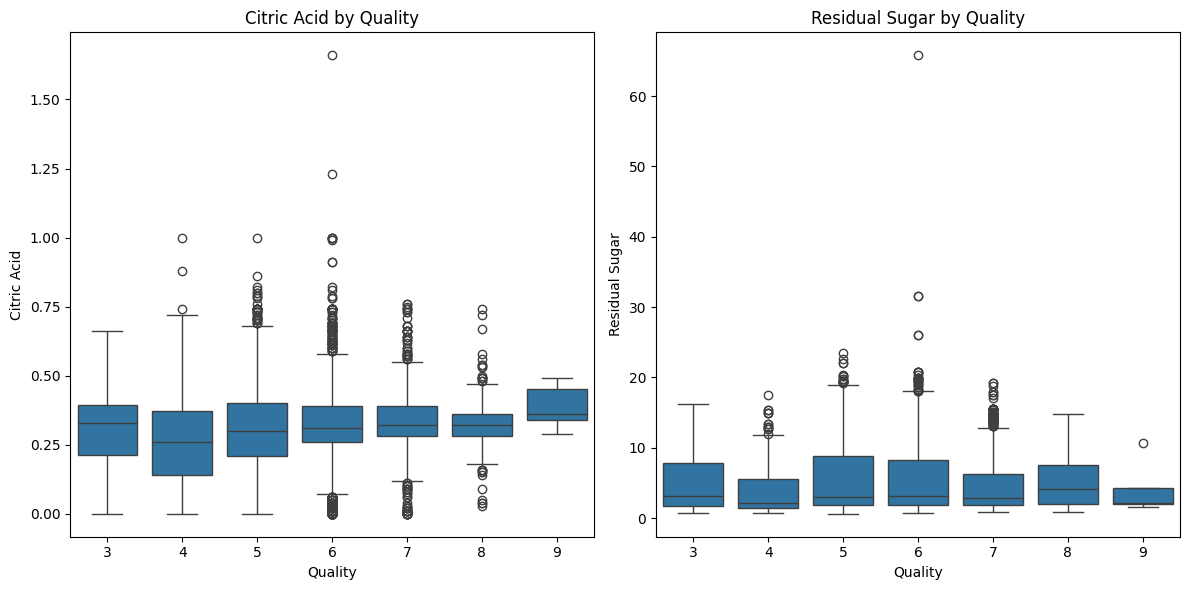

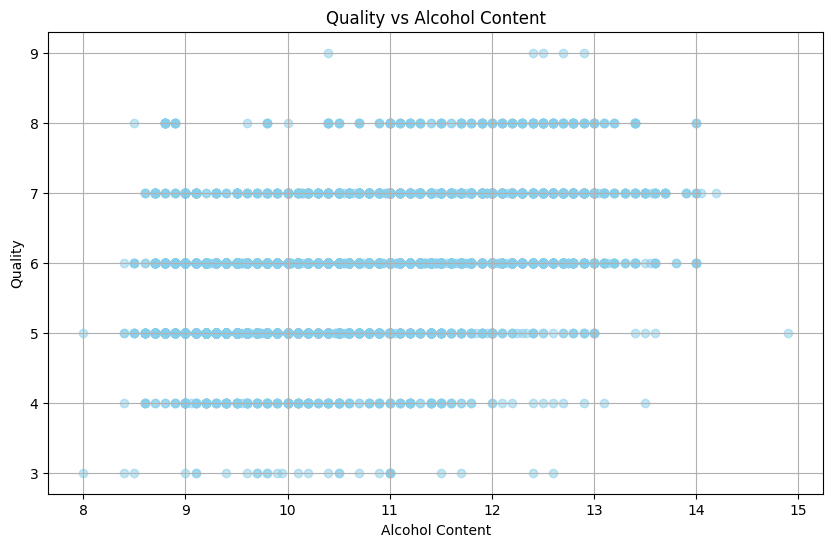

In [59]:
# Hypothesis Testing
# Test the formulated hypotheses using statistical tests or visualizations

# Scatter plot for chlorides and residual sugar vs quality of wine
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='citric_acid', y='quality', data=wine_data)
plt.title('Citric Acid vs Quality')
plt.xlabel('Citric Acid')
plt.ylabel('Quality')

plt.subplot(1, 2, 2)
sns.scatterplot(x='residual_sugar', y='quality', data=wine_data)
plt.title('Residual Sugar vs Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.tight_layout()
plt.show()

# Box plots for sugar and chlorides vs quality
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='quality', y='citric_acid', data=wine_data)
plt.title('Citric Acid by Quality')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')

plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='residual_sugar', data=wine_data)
plt.title('Residual Sugar by Quality')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.tight_layout()
plt.show()

#scatterplot for alcohol vs wine quality
plt.figure(figsize=(10, 6))
plt.scatter(wine_data['alcohol'], wine_data['quality'], color='skyblue', alpha=0.5)
plt.title('Quality vs Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

# Documentation and Reporting

To start my analysis, I did simple pandas commands to help me view what exact columns and type of data I was working with in the dataset. I imported the dataset from the UC Irvine ML repository, and used Pandas, Seaborn, NumPy, and matplotlib to make a first analysis of the dataset.

I was interested in how citric acid, alcohol, and residuals sugars affected the taste. They made the most sense to put a focus on, but I made sure to examine the other factors using Seaborn's pairplot and a heatmap displaying the different qualities.

To test my hypothesis as to how citric acid, alcohol content, and residuals sugars are important to wine quality, I used matplotlib and Seaborn to create boxplots and scatterplots to analyze the data.

For residual sugars, it seemed as if they had somewhat of an effect on how a wine performed. When analyzing the boxplot, best wines in terms of quality with a rating of 9 had the lower residual sugars. However, there were also wines with a rating of 3 that had lower residual sugars than the 9 rated wines. This somewhat proved my hypothesis.

For citric acid, when examining the scatter plot, one could see how the best wines had a percentage of approximately 30%-50% acidity. This examination backed up my hypothesis.

As for alcohol, I examined this using a scatterplot as well. I was surprised to see that the more alcohol percentage a wine had, the better the trajectory in its performance. This disproved my hypothesis, to where I stated that the best wines would have an alcohol percentage that isn't too high or low.